<div dir=rtl>
برای شروع کار، کتابخانه‌های ممورد نیاز را ایمپورت یا نصب می‌کنیم و فایل داده را که روی سرور گوگل کولب آپلود کردیم می‌خوانیم.
</div>

In [ ]:
!pip install sklearn_evaluation

In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, roc_auc_score, make_scorer
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn_evaluation import plot
from sklearn.model_selection import GridSearchCV
from sklearn_evaluation.plot import grid_search

In [ ]:
# read and check the dataset (uploaded on google colab)
dataset = pd.read_csv('diabetes.csv')
dataset.head()

,Unnamed: 0,Diabetes_binary,HighBP,High Cholesterol,Cholesterol Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical Activity,...,Any Health Care,No Doctor because of Cost,General Health,Mental Health,Physical Health,Difficulty Walking,Sex,Age,Education,Income
0,0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,...,1.0,0.0,Medium,5.0,30.0,0.0,male,4.0,Cat6,Cat8
1,1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,...,1.0,0.0,Medium,0.0,0.0,0.0,male,12.0,Cat6,Cat8
2,2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,...,1.0,0.0,High,0.0,10.0,0.0,male,13.0,Cat6,Cat8
3,3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,...,1.0,0.0,Medium,0.0,3.0,0.0,male,11.0,Cat6,Cat8
4,4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,...,1.0,0.0,Good,0.0,0.0,0.0,female,8.0,Cat5,Cat8


<div dir=rtl>
برای بررسی فیچرها و نوع آن‌ها اطلاعات داده‌ها را می‌گیریم.
</div>

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 70692 non-null  int64  
 1   Diabetes_binary            70692 non-null  float64
 2   HighBP                     70692 non-null  float64
 3   High Cholesterol           70692 non-null  float64
 4   Cholesterol Check          70692 non-null  float64
 5   BMI                        70691 non-null  float64
 6   Smoker                     70692 non-null  float64
 7   Stroke                     70692 non-null  float64
 8   HeartDiseaseorAttack       70691 non-null  float64
 9   Physical Activity          70691 non-null  float64
 10  Fruits                     70690 non-null  float64
 11  Veggies                    70691 non-null  float64
 12  Heavy Alcohol Consumption  70691 non-null  float64
 13  Any Health Care            70690 non-null  flo

<div dir=rtl>
<h2>نرمال سازی و پیش پردازش</h2>
در این بخش نام فیچرها را با جایگذاری _ به جای فاصله نرمال می‌کنیم و ستون Unnamed:_0 که اطلاعاتی ندارد و به کار نمی‌آید را نیز حذف می‌کنیم.همچنین بررسی می‌کنیم چند مقدار null برای هر فیچر وجود دارد.
</dir>

In [ ]:
# normalize column names
dataset.columns = dataset.columns.str.replace(' ','_')
dataset.drop(columns=['Unnamed:_0'], inplace=True)

In [ ]:
dataset.isnull().sum()

Diabetes_binary              0
HighBP                       0
High_Cholesterol             0
Cholesterol_Check            0
BMI                          1
Smoker                       0
Stroke                       0
HeartDiseaseorAttack         1
Physical_Activity            1
Fruits                       2
Veggies                      1
Heavy_Alcohol_Consumption    1
Any_Health_Care              2
No_Doctor_because_of_Cost    2
General_Health               1
Mental_Health                1
Physical_Health              1
Difficulty_Walking           2
Sex                          1
Age                          1
Education                    1
Income                       1
dtype: int64

<div dir=rtl>
مقادیر یونیک در هر ستون را چاپ می‌کنیم تا بررسی کنیم چه مقادیری غیر از نال نیاز به حذف دارند، مثلا unknown برای income.
</dir>

In [ ]:
for f in dataset:
    print(f,' ',dataset[f].unique())

Diabetes_binary   [0. 1.]
HighBP   [1. 0.]
High_Cholesterol   [0. 1.]
Cholesterol_Check   [1. 0.]
BMI   [26. 28. 29. 18. 31. 32. 27. 24. 21. 58. 30. 20. 22. 38. 40. 25. 36. 47.
 19. 37. 41. 23. 34. 35. 42. 17. 33. 44. 15. 52. 69. 56. 45. 39. 92. 53.
 98. 50. 46. 79. 48. 16. 63. 72. 54. 49. 68. 43. 84. 73. 76. 55. 51. 75.
 57. 60. 12. 77. 82. 67. 71. 61. 14. 81. 59. 86. 13. 87. 65. 95. 89. 62.
 64. 66. 85. 70. 83. nan 80. 78. 74.]
Smoker   [0. 1.]
Stroke   [0. 1.]
HeartDiseaseorAttack   [ 0.  1. nan]
Physical_Activity   [ 1.  0. nan]
Fruits   [ 0.  1. nan]
Veggies   [ 1.  0. nan]
Heavy_Alcohol_Consumption   [ 0.  1. nan]
Any_Health_Care   [ 1.  0. nan]
No_Doctor_because_of_Cost   [ 0.  1. nan]
General_Health   ['Medium' 'High' 'Good' 'Low' 'Very Low' nan]
Mental_Health   [ 5.  0.  7.  3.  4.  2. 30. 20.  1. 15. 10. 25. 14. 28.  6. 29. 26. 12.
 16. 22. 13.  8.  9. 21. 18. 17. 27. nan 24. 23. 11. 19.]
Physical_Health   [30.  0. 10.  3.  6.  4. 15.  1.  2. 14.  7. 25. 21. 20.  5.  8. 22. 2

<div dir=rtl>
حالا بسته به نوع ویژگی، مقادیر null را جایگزین می‌کنیم. برای ویژگی‌های باینری آن‌ها را drop می‌کنیم، برای ویژگی‌های عددی با میانگین جایگذاری می‌کنیم و برای ویژگی‌های categorical با دسته‌ای که بیشترین تکرار را داشته یا همان most frequent جایگزین می‌کنیم.
</dir>

In [ ]:
# handle null values in binary features
dataset.dropna(subset=['Diabetes_binary', 'HighBP', 'High_Cholesterol', 'Cholesterol_Check', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'Physical_Activity', 'Fruits'
,'Veggies', 'Heavy_Alcohol_Consumption', 'Any_Health_Care', 'No_Doctor_because_of_Cost', 'Difficulty_Walking'], inplace=True)

In [ ]:
# handle null values in numericl features
bmi_mean = dataset['BMI'].mean()
mh_mean = math.floor(dataset['Mental_Health'].mean())
ph_mean = math.floor(dataset['Physical_Health'].mean())
age_mean = math.floor(dataset['Age'].mean())

dataset.fillna({'BMI' : bmi_mean, 'Mental_Health' : mh_mean,'Physical_Health' : ph_mean, 'Age' : age_mean}, inplace = True)

In [ ]:
# handle null values in categorical features
dataset.drop((dataset.loc[(dataset['Income'] == 'Unknown')]).index, inplace=True)
dataset.fillna(dataset.select_dtypes(include='object').mode().iloc[0], inplace=True)

<div dir=rtl>
همانطور که مشاهده می‌شود پس از انجام این مراحل دیگر مقدار null نداریم و تعدادشان 0 است.
</dir>

In [ ]:
dataset.isnull().sum()

Diabetes_binary              0
HighBP                       0
High_Cholesterol             0
Cholesterol_Check            0
BMI                          0
Smoker                       0
Stroke                       0
HeartDiseaseorAttack         0
Physical_Activity            0
Fruits                       0
Veggies                      0
Heavy_Alcohol_Consumption    0
Any_Health_Care              0
No_Doctor_because_of_Cost    0
General_Health               0
Mental_Health                0
Physical_Health              0
Difficulty_Walking           0
Sex                          0
Age                          0
Education                    0
Income                       0
dtype: int64

<div dir=rtl>
داده‌های عددی را با استفاده از StandardScaler از کتابخانه sklearn تغییر مقیاس می‌دهیم تا همه در یک بازه قرار بگیرند.
</dir>

In [ ]:
# normalize numerical features
scaler = StandardScaler()
dataset[['BMI', 'Mental_Health', 'Physical_Health', 'Age']] = scaler.fit_transform(dataset[['BMI', 'Mental_Health', 'Physical_Health', 'Age']])
display(dataset)

,Diabetes_binary,HighBP,High_Cholesterol,Cholesterol_Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical_Activity,Fruits,...,Any_Health_Care,No_Doctor_because_of_Cost,General_Health,Mental_Health,Physical_Health,Difficulty_Walking,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,-0.542203,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,Medium,0.153042,2.404160,0.0,male,-1.607245,Cat6,Cat8
1,0.0,1.0,1.0,1.0,-0.542203,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,Medium,-0.460059,-0.577443,0.0,male,1.197699,Cat6,Cat8
2,0.0,0.0,0.0,1.0,-0.542203,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,High,-0.460059,0.416425,0.0,male,1.548317,Cat6,Cat8
3,0.0,1.0,1.0,1.0,-0.261069,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Medium,-0.460059,-0.279283,0.0,male,0.847081,Cat6,Cat8
4,0.0,0.0,0.0,1.0,-0.120502,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Good,-0.460059,-0.577443,0.0,female,-0.204773,Cat5,Cat8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,1.004036,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,-0.460059,-0.577443,0.0,female,-0.906009,Cat4,Cat1
70688,1.0,0.0,1.0,1.0,-0.120502,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Good,-0.460059,-0.577443,1.0,male,0.496463,Cat3,Cat6
70689,1.0,1.0,1.0,1.0,-0.682771,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Very Low,1.379243,-0.577443,1.0,female,1.548317,Cat6,Cat4
70690,1.0,1.0,1.0,1.0,-1.666741,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,-0.460059,-0.577443,1.0,female,0.847081,Cat2,Cat4


<div dir=rtl>
ویژگی‌های categorical را به صورت one-hot encoding تبدیل میکنیم که عددی شوند . برای این کار از کتابخانه pandas استفاده کردیم.
</dir>

In [ ]:
# one-hot encoding the categorical features
dataset_final = pd.get_dummies(dataset)
display(dataset_final)

,Diabetes_binary,HighBP,High_Cholesterol,Cholesterol_Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical_Activity,Fruits,...,Education_Cat5,Education_Cat6,Income_Cat1,Income_Cat2,Income_Cat3,Income_Cat4,Income_Cat5,Income_Cat6,Income_Cat7,Income_Cat8
0,0.0,1.0,0.0,1.0,-0.542203,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1
1,0.0,1.0,1.0,1.0,-0.542203,1.0,1.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,1
2,0.0,0.0,0.0,1.0,-0.542203,0.0,0.0,0.0,1.0,1.0,...,0,1,0,0,0,0,0,0,0,1
3,0.0,1.0,1.0,1.0,-0.261069,1.0,0.0,0.0,1.0,1.0,...,0,1,0,0,0,0,0,0,0,1
4,0.0,0.0,0.0,1.0,-0.120502,1.0,0.0,0.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,1.004036,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
70688,1.0,0.0,1.0,1.0,-0.120502,1.0,0.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,1,0,0
70689,1.0,1.0,1.0,1.0,-0.682771,0.0,0.0,1.0,0.0,1.0,...,0,1,0,0,0,1,0,0,0,0
70690,1.0,1.0,1.0,1.0,-1.666741,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0


<div dir=rtl>
در نهایت همه ویژگی‌ها به جز آخری که همان هدف است را به عنوان داده و آن ویژگی یعنی Diabetes_binary را به عنوان برچسب داده‌ها جدا می‌کنیم. با استفاده از sklearn داده‌ها را به دو بخش آموزشی و تست تقسیم می‌کنیم ( با نسبت 0.8 . 0.2)
</dir>

In [ ]:
# seperate data and label and train and test datasets
X = dataset_final.drop("Diabetes_binary", axis=1)
y = dataset_final['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

<div dir=rtl>
پارامترهای XGBoost classifier را برای بررسی چاپ کردیم.
</dir>

In [ ]:
xgb.XGBClassifier().get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

<div dir=rtl>
<h2>ساخت مدل طبقه‌بند</h2>
با پارامترهای داده شده در دستور کار طبقه‌بند را می‌سازیم و دقتش را روی داده‌های آموزشی و تست چاپ می‌کنیم که به ترتیب 75.385486% و 76.197634% است. ماتریس درهم ریختگی و presicion و recall نیز در خروجی‌های بعدی مشخص است.
</dir>

In [ ]:
classifier = xgb.XGBClassifier(
    learning_rate=0.1,
    max_depth=4,
    n_estimators=200,
    subsample=0.5,
    colsample_bytree=1,
    random_seed=123,
    eval_metric='auc',
    early_stopping_rounds=10,
    verbosity=1
)

classifier.fit(X_train,
               y_train.ravel())

test_pred = classifier.predict(X_test)
train_pred = classifier.predict(X_train)

# Score
test_accuracy = accuracy_score(y_test, test_pred)
train_accuracy = accuracy_score(y_train, train_pred)

print("Test Accuracy: %.2f%%" % (test_accuracy * 100.0))
print("Train Accuracy: %.2f%%" % (train_accuracy * 100.0))

Test Accuracy: 75.70%
Train Accuracy: 76.13%


[[5040 2029]
 [1406 5663]]


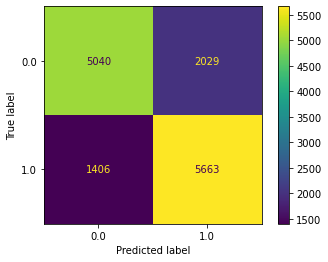

In [ ]:
# confusion matrix
matrix = confusion_matrix(y_test, test_pred)
print(matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=classifier.classes_)
disp.plot()
plt.show()

In [ ]:
# calculate test and train precision and recall
print("Test precision: " ,  precision_score(y_test, test_pred, average='weighted'))
print("Train precision: " , precision_score(y_train, train_pred, average='weighted'))

print("Test recall: " , recall_score(y_test, test_pred, average='weighted'))
print("Train recall: " , recall_score(y_train, train_pred, average='weighted'))

Test precision:  0.7590498422915508
Train precision:  0.7632181640824282
Test recall:  0.7570377705474608
Train recall:  0.7613001343990946


<div dir=rtl>
<h2>تنظیم هایپرپارامترها</h2>
در این قسمت از GridSearchCV استفاده می‌کنیم. ابتدا یک طبقه‌بند با پارامترهای داده شده در دستورکار ساخته و با تابع امتیازدهی داده شده به grid ورودی می‌دهیم و نتایج را بررسی می‌کنیم. همچنین cv=3 به معنای اعتبارسنجی متقابل با 3 نقطه جداسازی است.
</dir>

In [ ]:
def my_roc_auc_score(classifier, X, y):
   return roc_auc_score(y, classifier.predict_proba(X)[:,1])

parameters = {
    "learning_rate":  [0.02, 0.05, 0.1, 0.3],
    "max_depth": [2, 3, 4],
    "n_estimators":  [100, 200, 300],
    "colsample_bytree": [0.8, 1],
}

new_classifier = xgb.XGBClassifier(subsample=0.5,eval_metric='auc')

test_model = GridSearchCV(new_classifier, parameters, n_jobs=-1, cv=3, scoring=my_roc_auc_score)

test_model.fit(X_train, y_train.ravel())

GridSearchCV(cv=3, estimator=XGBClassifier(eval_metric='auc', subsample=0.5),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1],
                         'learning_rate': [0.02, 0.05, 0.1, 0.3],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [100, 200, 300]},
             scoring=<function my_roc_auc_score at 0x7fe75ced0440>)

<div dir=rtl>
بهترین امتیازی که مدل کسب کرده:
</dir>

In [ ]:
test_model.best_score_

0.8301694999379295

<div dir=rtl>
بهترین پارارمترها:
</dir>

In [ ]:
test_model.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.05,
 'max_depth': 3,
 'n_estimators': 300}

<div dir=rtl>
در این بخش با بهترین پارامترها که ازقسمت قبل به دست آمد یک مدل نهایی می‌سازیم که دقت آن روی داده‌های آموزشی و تست، ماتریس در هم ریختگی و precision و recall در خروجی‌های بعدی گزارش شده است.
</dir>

In [ ]:
final_classifier = xgb.XGBClassifier(**test_model.best_params_)

In [ ]:
from sklearn.metrics import roc_auc_score

final_classifier.fit(X_train, y_train.ravel())


best_test_pred = final_classifier.predict(X_test)
best_train_pred = final_classifier.predict(X_train)

best_test_accuracy = accuracy_score(y_test, test_pred)
best_train_accuracy = accuracy_score(y_train, train_pred)

print("Test Accuracy: %.2f%%" % (best_test_accuracy * 100.0))
print("Train Accuracy: %.2f%%" % (best_train_accuracy * 100.0))

Test Accuracy: 75.70%
Train Accuracy: 76.13%


[[5069 2000]
 [1428 5641]]


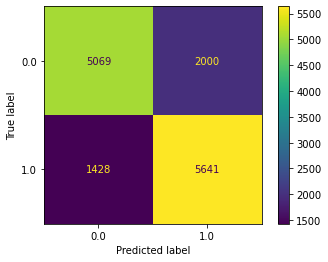

In [ ]:
new_matrix = confusion_matrix(y_test, best_test_pred)
print(new_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=new_matrix, display_labels=classifier.classes_)
disp.plot()
plt.show()

In [ ]:
print("New Test precision: " , precision_score(y_test, best_test_pred, average='weighted'))
print("New Train precision: " , precision_score(y_train, train_pred, average='weighted'))

print("New Test recall: " , recall_score(y_test, best_test_pred, average='weighted'))
print("New Train recall: " , recall_score(y_train, train_pred, average='weighted'))

New Test precision:  0.7592302021266517
New Train precision:  0.7632181640824282
New Test recall:  0.757532890083463
New Train recall:  0.7613001343990946


<div dir=rtl>
<h2>تصویرسازی تغییر هایپرپارامترها</h2>
برای اینکه ببینیم تغییر هایپرپارامترهای مختلف چه تاثیری بر عملکرد مدل گذاشته است از نمودارهای مختلفی استفاده کردیم. در 4 نمودار بعدی در هرکدام تغییر یک پارامتر و تاثیر آن بر میانگین امتیاز نشان داده شده است. در واقع این نمودارها نشان می‌دهند که در هر حالت ممکن از ترکیب هایپرپارارمترها چه امتیازی به دست آمده است. مثلا در نمودار اول تغییرات colsample_bytree و تاثیر تغییر بقیه پارامترها در حالتی که این پارامتر 0.8 یا 1 باشد بر امتیاز نشان داده شده است. بقیه نمودارها نیز به طور مشابه رسم شده‌اند.
</dir>

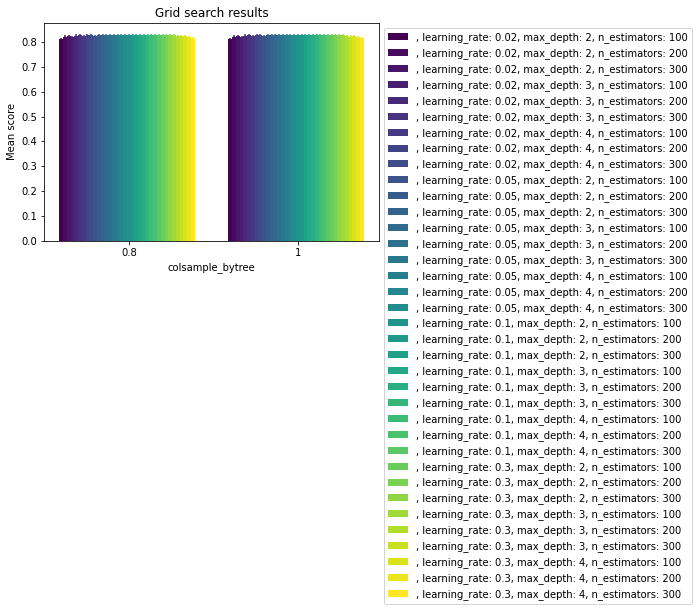

In [ ]:
grid_search(test_model.cv_results_, change='colsample_bytree', kind='bar')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

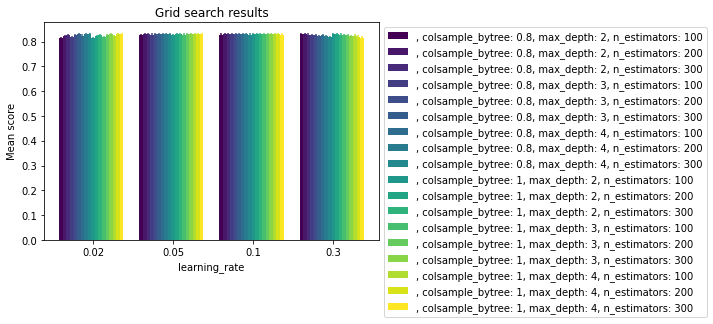

In [ ]:
grid_search(test_model.cv_results_, change='learning_rate', kind='bar')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

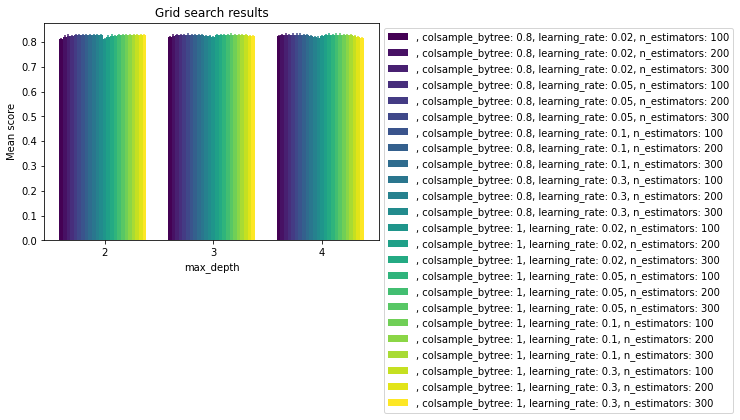

In [ ]:
grid_search(test_model.cv_results_, change='max_depth', kind='bar')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

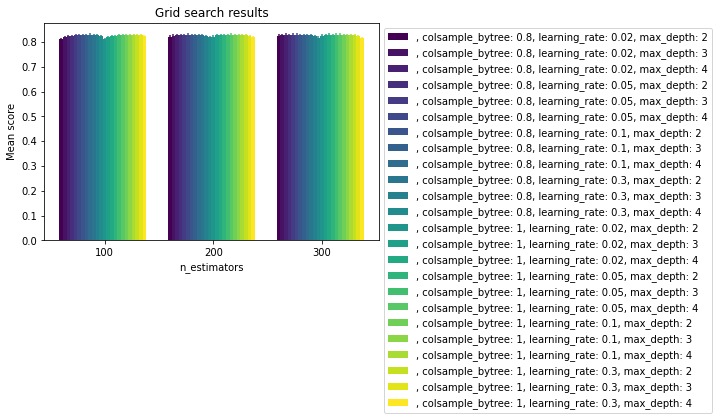

In [ ]:
grid_search(test_model.cv_results_, change='n_estimators', kind='bar')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

<div dir=rtl>
در دو نمودار بعدی، بررسی کردیم که اگر دو هایپرپارامتر را ثابت بگیریم و دوتای دیگر را تغییر دهیم امتیاز در هر حالت چه تغییری می‌کند. این نمودار را برای دو نمونه رسم کردیم که برای حالات دیگر نیز به طور مشابه قابل رسم است.
</dir>

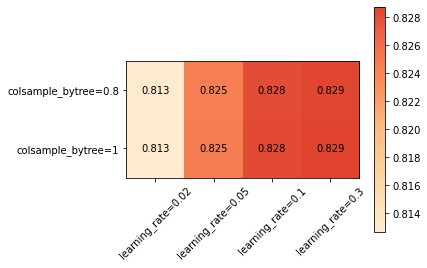

In [ ]:
grid_search(test_model.cv_results_, change=('colsample_bytree', 'learning_rate'),
                 subset={'max_depth': 2, 'n_estimators': 100})
plt.show()

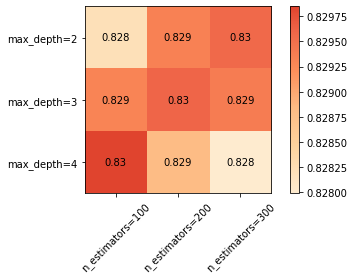

In [ ]:
grid_search(test_model.cv_results_, change=('max_depth', 'n_estimators'),
                 subset={'colsample_bytree': 0.8, 'learning_rate': 0.1})
plt.show()

<div dir=rtl>
در این نمودارها نیز بررسی می‌شود تغییر هر هایپرپارامتر به طور کلی چگونه امتیاز را تحت تاثیر قرار می‌دهد.در واقع ماکسیمم هر نمودار همان بهترین حالت است که الگوریتم برمیگرداند.
</dir>

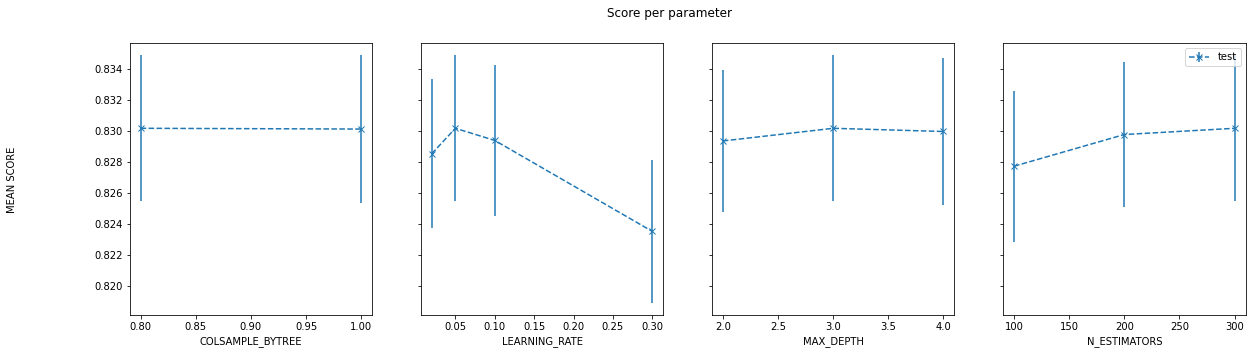

In [ ]:
# source: https://stackoverflow.com/questions/37161563/how-to-graph-grid-scores-from-gridsearchcv
def plot_search_results(grid):
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']

    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='x', label='test')
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()

plot_search_results(test_model)